## **Aplicación del Modelo ResNet50 para proyecto de Tamizaje automatizado de glaucoma con Inteligencia Artificial**



## ¿Qué es ResNet?

**ResNet = Residual Network**, desarrollada por Microsoft Research.

Objetivo: **Entrenar redes MUY profundas sin que colapsen.**

**ResNet50 → tiene 50 capas.**

Usa la técnica de bloques residuales: su función es permitir que algunas capas “se salten” otras a través de una conexión de atajo (skip connection).Esta estructura facilita el aprendizaje de la identidad y mejora la retropropagación.



---



---



🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
# **WORKFLOW**
1. Exploración y carga de datasets
2. Preprocesamiento de imágenes
3. División del Dataset en train, validation and test
4. Preparación del modelo ResNet50
5. Entrenamiento del modelo
6. Evaluación de métricas
7. Ajuste del modelo para mejoras
8. Test Final con Datos nuevos
9. Guardar modelo Final


🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨🧨






---



---



# **1. Exploración y carga de datasets**

## MONTAR DRIVE Y CONFIGURAR RUTAS 

Se espera encontrar las imágenes en la carpeta base, conteniendo las diferentes bases de datos de imágenes en una carpeta cada una: ORIGA, REFUGE y G1020.

Si los datos se encuentran en Google Drive / Google Colab (descomentar estas líneas):

In [ ]:
# from google.colab import drive
# import os

# # Montar Drive
# drive.mount('/content/drive')

# # Rutas base
# base_path = "/content/drive/MyDrive/GlaucomaProject/Datasets"

# model_path = "/content/"

Si los datos se encuentran en local (descomentar estas líneas):

In [41]:
import os
base_path = "./datos/"
model_path = "./"

In [6]:
# Definir rutas para los datasets
origa_path = os.path.join(base_path, "ORIGA")
refuge_path = os.path.join(base_path, "REFUGE")
g1020_path = os.path.join(base_path, "G1020")

## ESTRUCTURA UNIFICADA PARA DATAFRAME MAESTRO

Se construye un dataframe con estas columnas:

- `image_path`: ruta completa a la imagen

- `label`: **0 = No glaucoma**, **1 = Glaucoma**

- `source`: ORIGA / REFUGE / G1020


## ANÁLISIS POR DATASET

### **ORIGA**

- Usaremos: **Images** y el archivo **OrigaList.csv** o **origa_info.csv**

- Contiene etiquetas clínicas (glaucoma = 1, no = 0)


In [8]:
#inspección rápida de las columnas en OrigaList.csv
import pandas as pd

origaListCSV = os.path.join(origa_path, "OrigaList.csv")

# Cargar el archivo CSV de OrigaList
origa_df = pd.read_csv(origaListCSV)
print(origa_df.columns)

print("Número de registros en OrigaList.csv:", len(origa_df))

# Mostrar las primeras filas del DataFrame
print("📋 Muestra del DataFrame OrigaList.csv:")
print(origa_df.sample(10))  # También puedes usar .sample(5) para ver filas aleatorias


Index(['Eye', 'Filename', 'ExpCDR', 'Set', 'Glaucoma'], dtype='object')
Número de registros en OrigaList.csv: 650
📋 Muestra del DataFrame OrigaList.csv:
    Eye Filename  ExpCDR Set  Glaucoma
120  OD  121.jpg  0.6830   B         0
69   OS  070.jpg  0.6490   A         0
611  OS  612.jpg  0.5861   A         1
464  OS  465.jpg  0.6534   B         1
422  OD  423.jpg  0.5200   A         0
236  OS  237.jpg  0.5398   B         0
125  OD  126.jpg  0.4909   A         0
72   OD  073.jpg  0.5341   A         0
57   OS  058.jpg  0.6342   A         0
555  OD  556.jpg  0.7030   A         1


In [9]:
import os
import pandas as pd

# Cargar el archivo OrigaList.csv
origa_df = pd.read_csv(os.path.join(origa_path, "OrigaList.csv"))

# Crear columna con path completo de la imagen
origa_df['image_path'] = origa_df['Filename'].apply(lambda x: os.path.join(origa_path, "Images", x))

# Asignar la etiqueta
origa_df['label'] = origa_df['Glaucoma']  # 0: no glaucoma, 1: glaucoma

# Añadir fuente
origa_df['source'] = 'ORIGA'

# Seleccionar solo las columnas necesarias
origa_df = origa_df[['image_path', 'label', 'source']]

# Verificar que todo esté bien
print(origa_df.head())


                     image_path  label source
0  ./datos/ORIGA/Images/001.jpg      0  ORIGA
1  ./datos/ORIGA/Images/002.jpg      0  ORIGA
2  ./datos/ORIGA/Images/003.jpg      0  ORIGA
3  ./datos/ORIGA/Images/004.jpg      0  ORIGA
4  ./datos/ORIGA/Images/005.jpg      0  ORIGA


### **REFUGE**

- Usaremos: **train/Images + train/index.json**

In [12]:
import json

refuge_index_path = os.path.join(refuge_path, "train/index.json")

# Cargar el archivo JSON de REFUGE
with open(refuge_index_path, 'r') as f:
    refuge_index = json.load(f)  # 👈 esto convierte el JSON a objetos Python (list/dict)


In [13]:
for i, item in enumerate(refuge_index.values()):
    print(f"Registro {i}: {item}")
    break


Registro 0: {'ImgName': 'g0001.jpg', 'Fovea_X': 1057.95, 'Fovea_Y': 1076.52, 'Size_X': 2124, 'Size_Y': 2056, 'Label': 1}


In [19]:
refuge_data = []

refuge_images_path = os.path.join(refuge_path, "train", "images")

for item in refuge_index.values():
    filename = item['ImgName']
    label = item['Label']  # Ya es 0 o 1 directamente
    refuge_data.append({
        'image_path': f"{refuge_images_path}/{filename}",
        'label': label,
        'source': 'REFUGE'
    })

refuge_df = pd.DataFrame(refuge_data)

# Verificar que todo esté bien
print(refuge_df.head())


                              image_path  label  source
0  ./datos/REFUGE/train/images/g0001.jpg      1  REFUGE
1  ./datos/REFUGE/train/images/g0002.jpg      1  REFUGE
2  ./datos/REFUGE/train/images/g0003.jpg      1  REFUGE
3  ./datos/REFUGE/train/images/g0004.jpg      1  REFUGE
4  ./datos/REFUGE/train/images/g0005.jpg      1  REFUGE


### **G1020**

- Usaremos: **G1020.csv** y la carpeta **Images**


In [16]:
#inspección rápida de las columnas en G1020.csv
g1020_csv_path = os.path.join(g1020_path, "G1020.csv")
g1020_df = pd.read_csv(g1020_csv_path)
print(g1020_df.columns)


Index(['imageID', 'binaryLabels'], dtype='object')


In [22]:
g1020_df = pd.read_csv(g1020_csv_path)

g1020_images_path = os.path.join(g1020_path, "Images")


# Creamos columna con path absoluto a la imagen
g1020_df['image_path'] = g1020_df['imageID'].apply(
    lambda x: f"{g1020_images_path}/{x}"
)

# Renombramos la etiqueta y añadimos la fuente
g1020_df['label'] = g1020_df['binaryLabels']
g1020_df['source'] = 'G1020'

# Nos quedamos solo con las columnas necesarias
g1020_df = g1020_df[['image_path', 'label', 'source']]

# Verificar que todo esté bien
print(g1020_df.head())


                         image_path  label source
0  ./datos/G1020/Images/image_0.jpg      0  G1020
1  ./datos/G1020/Images/image_1.jpg      0  G1020
2  ./datos/G1020/Images/image_3.jpg      0  G1020
3  ./datos/G1020/Images/image_4.jpg      0  G1020
4  ./datos/G1020/Images/image_5.jpg      0  G1020


## UNIFICAR TODO EN UN SOLO DATASET

In [27]:
df_total = pd.concat([origa_df, refuge_df, g1020_df], ignore_index=True)
print(df_total['label'].value_counts())
df_total.sample(10)


label
0    1566
1     504
Name: count, dtype: int64


,image_path,label,source
1848,./datos/G1020/Images/image_2559.jpg,0,G1020
1114,./datos/G1020/Images/image_199.jpg,1,G1020
680,./datos/REFUGE/train/images/g0031.jpg,1,REFUGE
1263,./datos/G1020/Images/image_646.jpg,0,G1020
1396,./datos/G1020/Images/image_1198.jpg,0,G1020
177,./datos/ORIGA/Images/178.jpg,0,ORIGA
1412,./datos/G1020/Images/image_1231.jpg,1,G1020
35,./datos/ORIGA/Images/036.jpg,1,ORIGA
691,./datos/REFUGE/train/images/n0002.jpg,0,REFUGE
410,./datos/ORIGA/Images/411.jpg,0,ORIGA


### Explorando las imágenes de nuestro dataset unificado

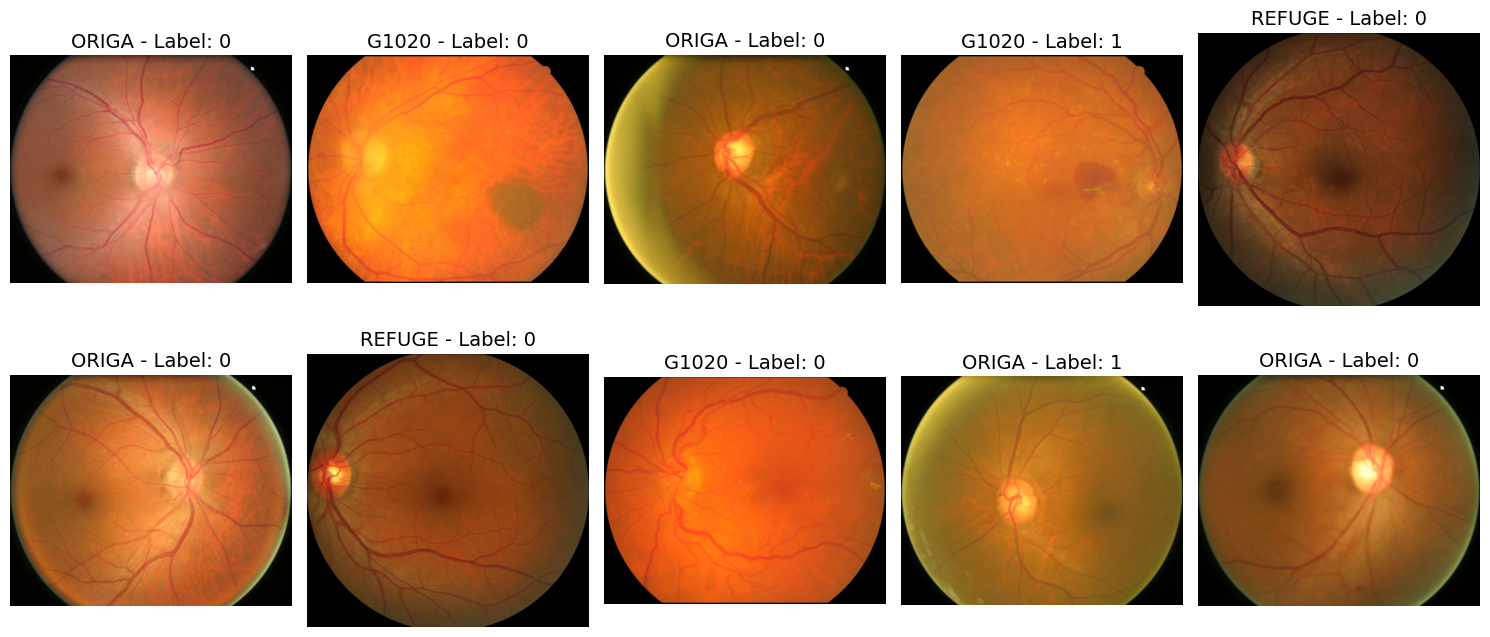

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Seleccionar 10 filas aleatorias
sample_df = df_total.sample(10).reset_index(drop=True)

# Crear la figura
plt.figure(figsize=(15, 7))

# Recorrer cada fila y mostrar la imagen con su etiqueta
for i in range(10):
    img_path = sample_df.loc[i, 'image_path']
    label = sample_df.loc[i, 'label']
    source = sample_df.loc[i, 'source']




    # Cargar imagen
    img = mpimg.imread(img_path)

    # Mostrar imagen
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{source} - Label: {label}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


# **2. Preprocesamiento de imágenes**
# **3. División del Dataset en train, val and test**

Checklist para este paso:

| Proceso            | Descripción                                                          |
| ------------------ | -------------------------------------------------------------------- |
| Verificar imágenes | Validar que el archivo existe (`os.path.exists`)                     |
| Redimensionar      | Todas las imágenes a `224x224`                                       |
| Normalizar         | Escalar los valores de píxeles \[0, 1]                               |
| Data Augmentation  | Aplicar transformaciones (flip, rotación...) para evitar overfitting |
| Dividir en sets    | Separar en train (68%), val (17%) y test (15%)                       |


## Verificar existencia de imágenes

In [29]:
import os
import pandas as pd

# Convertir la columna 'image_path' a string para manejar posibles tipos mixtos
df_total['image_path'] = df_total['image_path'].astype(str)

# Filtramos solo las que existen
df_total = df_total[df_total['image_path'].apply(os.path.exists)]
print("Total imágenes válidas:", len(df_total))


Total imágenes válidas: 2070


📊 Distribución de clases:
Clase 0 (No Glaucoma): 1566 imágenes
Clase 1 (Glaucoma): 504 imágenes


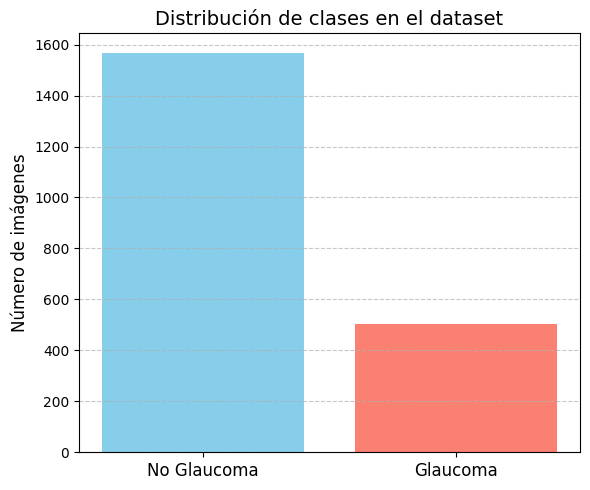

In [30]:
import matplotlib.pyplot as plt

# Contar las clases
class_counts = df_total['label'].value_counts().sort_index()

# Mostrar conteo por clase
print("📊 Distribución de clases:")
for label, count in class_counts.items():
    clase = "No Glaucoma" if label == 0 else "Glaucoma"
    print(f"Clase {label} ({clase}): {count} imágenes")

# Graficar la distribución
plt.figure(figsize=(6, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No Glaucoma', 'Glaucoma'], fontsize=12)
plt.ylabel("Número de imágenes", fontsize=12)
plt.title("Distribución de clases en el dataset", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Importar librerías necesarias para el preprocesamiento

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#### Definir `ImageDataGenerator` para cada conjunto

In [32]:
# Generador para entrenamiento con data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normaliza a [0,1]
    rotation_range=20,           # Rotación aleatoria
    width_shift_range=0.1,       # Desplazamiento horizontal
    height_shift_range=0.1,      # Desplazamiento vertical
    zoom_range=0.1,              # Zoom aleatorio
    horizontal_flip=True,        # Flip horizontal
    validation_split=0.2         # Separación de 20% para validación
)

# Generador para validación (sin aumentos, solo normalización)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


#### Crear generadores desde `df_total `usando `flow_from_dataframe`

In [33]:
target_size = (224, 224)
batch_size = 32

# Convertir los labels a string
df_total['label'] = df_total['label'].astype(str)

# Generador de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_total,
    x_col='image_path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

# Generador de validación
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_total,
    x_col='image_path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 1656 validated image filenames belonging to 2 classes.
Found 414 validated image filenames belonging to 2 classes.


## División del dataset

División 68% train, 17% val,  15% test

In [34]:
from sklearn.model_selection import train_test_split

# Primero separamos train_val vs test
df_train_val, df_test = train_test_split(
    df_total, test_size=0.15, stratify=df_total['label'], random_state=42)

# Ahora de df_train_val sacamos train y val
df_train, df_val = train_test_split(
    df_train_val, test_size=0.2, stratify=df_train_val['label'], random_state=42)

# Verificamos las proporciones
print("✅ Total:", len(df_total))
print("📚 Train:", len(df_train))
print("🧪 Val:", len(df_val))
print("🧾 Test:", len(df_test))


✅ Total: 2070
📚 Train: 1407
🧪 Val: 352
🧾 Test: 311


# **4. Preparación del modelo ResNet50**

Estructura del modelo:

| Componente                                        | Rol                                                          |
| ------------------------------------------------- | ------------------------------------------------------------ |
| `ResNet50(weights='imagenet', include_top=False)` | Usamos la red preentrenada como extractor de características |
| `GlobalAveragePooling2D()`                        | Reduce dimensionalidad sin perder contexto espacial          |
| `Dropout(0.5)`                                    | Previene overfitting                                         |
| `Dense(128, activation='relu')`                   | Aprende patrones relevantes del fondo de ojo                 |
| `Dense(1, activation='sigmoid')`                  | Salida binaria: probabilidad de glaucoma                     |


In [35]:
#modelo ResNet50 personalizado
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam

# Dimensión de entrada esperada por ResNet50
input_shape = (224, 224, 3)

# Cargar el modelo base preentrenado sin la cabeza (top)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar capas del modelo base
base_model.trainable = False  # Puedes luego descongelar algunas capas si deseas fine-tuning

# Construir modelo personalizado
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)  # Importante: training=False en modo inferencia
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Modelo final
model = Model(inputs, outputs)

# Compilar
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 🔹 Resumen del modelo
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

**¿Por qué se congelan las capas de un modelo preentrenado como ResNet50?**

Partimos de un modelo (ResNet50) entrenado previamente en millones de imágenes (ImageNet). Este modelo ya aprendió a detectar cosas como: bordes, texturas, formas circulares, contrastes, gradientes, e incluso patrones de retina.

La idea de congelar las capas es aprovechar ese conocimiento.

El momento de descongelar las capas es cuando el modelo ya entrenó la cabeza (top) y hay evidencia que no detecta bien los casos complejos, en este sentido sería la clase Glaucoma.


| Etapa                  | ¿Capas base?                    | ¿Objetivo?                                                   |
| ---------------------- | ------------------------------- | ------------------------------------------------------------ |
| Transfer learning base | Congeladas                      | Entrenar cabeza personalizada                                |
| Fine-tuning avanzado   | Descongeladas (parcial o total) | Aprender características específicas del problema (glaucoma) |


# **5. Entrenamiento del Modelo**

En este paso:

- Se entrena el modelo con los generadores `train_generator` y `val_generator`
- Su usará **early stopping** para evitar sobreentrenamiento
- Se guarda el mejor modelo durante el entrenamiento con **model checkpoint**
- Se registra la evolución de métricas


| Código            | Explicación                                                                 |
| ----------------- | --------------------------------------------------------------------------- |
| `EarlyStopping`   | Detiene el entrenamiento si `val_loss` no mejora (previene overfitting)     |
| `ModelCheckpoint` | Guarda automáticamente el mejor modelo (por `val_loss`) en un archivo `.h5` |
| `model.fit(...)`  | Inicia el entrenamiento por lotes usando los generadores configurados                    |
| `class_weight`  | Si las clases están desbalanceadas                    |

#### Calcular `class_weight`

In [36]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Asegurarse de que los labels sean enteros
df_train['label'] = df_train['label'].astype(int)

# Calcular los pesos
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df_train['label']),
    y=df_train['label']
)

class_weight_dict = dict(zip(np.unique(df_train['label']), class_weights))

print("📊 Class Weights:", class_weight_dict)


📊 Class Weights: {np.int64(0): np.float64(0.6605633802816901), np.int64(1): np.float64(2.057017543859649)}


#### Configurar los callbacks

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback para detener si no mejora
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callback para guardar el mejor modelo
checkpoint = ModelCheckpoint(
    filepath='resnet50_glaucoma_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stop, checkpoint]


## Entrenar el modelo

In [38]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)


/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5294 - loss: 0.7383
Epoch 1: val_loss improved from inf to 0.76760, saving model to resnet50_glaucoma_best.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.5284 - loss: 0.7383 - val_accuracy: 0.1932 - val_loss: 0.7676
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.4693 - loss: 0.7337
Epoch 2: val_loss improved from 0.76760 to 0.75065, saving model to resnet50_glaucoma_best.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4694 - loss: 0.7335 - val_accuracy: 0.1932 - val_loss: 0.7507
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.5215 - loss: 0.7029
Epoch 3: val_loss did not improve from 0.75065
52/52 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5211 - loss: 0.7032 - val_accuracy: 0.1932 - val_loss: 0.8022
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.4345 - loss: 0.7269
Epoch 4: val_loss did not improve from 0.75065
52/52 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4351 - loss: 0.7268 - val_accuracy: 0.1932 - val_loss: 0.7702
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4790 - loss: 0.7100
Epoch 5: val_loss did not improve from 0.75065
52/52 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4787 - loss: 0.7103 - val_accuracy: 0.1932 - val_loss: 0.7689
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.4571 - loss: 0.7088
Epoch 6: val_loss did not improve from 0.75065
52/52 ━━━━━

52/52 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.4341 - loss: 0.7362 - val_accuracy: 0.6667 - val_loss: 0.6889
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5076 - loss: 0.7237
Epoch 8: val_loss improved from 0.68893 to 0.65644, saving model to resnet50_glaucoma_best.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5067 - loss: 0.7236 - val_accuracy: 0.8068 - val_loss: 0.6564
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5396 - loss: 0.7177
Epoch 9: val_loss did not improve from 0.65644
52/52 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5389 - loss: 0.7176 - val_accuracy: 0.1932 - val_loss: 0.7859
Epoch 10/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4497 - loss: 0.7174
Epoch 10: val_loss did not improve from 0.65644
52/52 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4498 - loss: 0.7173 - val_accuracy: 0.1932 - val_loss: 0.7310
Epoch 11/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.5147 - loss: 0.7127
Epoch 11: val_loss did not improve from 0.65644
52/52 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.5141 - loss: 0.7127 - val_accuracy: 0.1932 - val_loss: 0.7694
Epoch 12/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4530 - loss: 0.7246
Epoch 12: val_loss did not improve from 0.65644
52/52 ━━━━━

El mejor modelo se guardó en la siguiente ruta: ./resnet50_glaucoma_best.h5

# **6. Evaluación del Modelo**

## Cargar el mejor modelo

In [42]:
from tensorflow.keras.models import load_model

# Cargamos el mejor modelo guardado durante el entrenamiento
best_model = load_model(model_path + 'resnet50_glaucoma_best.h5')


## Evaluación en el set de test

In [43]:
#Crear test_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador sin aumentos (solo normalización)
test_datagen = ImageDataGenerator(rescale=1./255)

# Asegurarse de que los labels sean strings
df_test['label'] = df_test['label'].astype(str)

# Crear test_generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 311 validated image filenames belonging to 2 classes.


In [44]:
# Evaluar pérdida y precisión en test
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"📉 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 710ms/step - accuracy: 0.7179 - loss: 0.6643
📉 Test Loss: 0.6599
✅ Test Accuracy: 74.60%


## Obtener predicciones (probabilidades y clases)

In [45]:
import numpy as np

# Obtener probabilidades predichas
y_prob = best_model.predict(test_generator)

# Convertir a clases (umbral 0.8)
y_pred = (y_prob > 0.8).astype(int).flatten()

# Verdaderos labels
y_true = test_generator.classes


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 758ms/step


## Matriz de confusión y Reporte de Clasificación

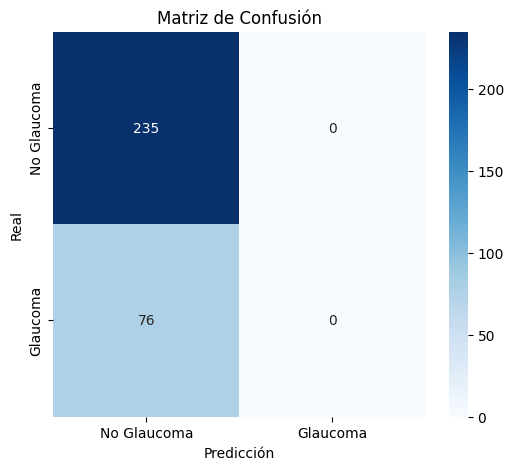

📋 Reporte de Clasificación:

              precision    recall  f1-score   support

 No Glaucoma       0.76      1.00      0.86       235
    Glaucoma       0.00      0.00      0.00        76

    accuracy                           0.76       311
   macro avg       0.38      0.50      0.43       311
weighted avg       0.57      0.76      0.65       311



/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar como heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Glaucoma', 'Glaucoma'], yticklabels=['No Glaucoma', 'Glaucoma'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte detallado
print("📋 Reporte de Clasificación:\n")
print(classification_report(y_true, y_pred, target_names=['No Glaucoma', 'Glaucoma']))


### Curva ROC y AUC

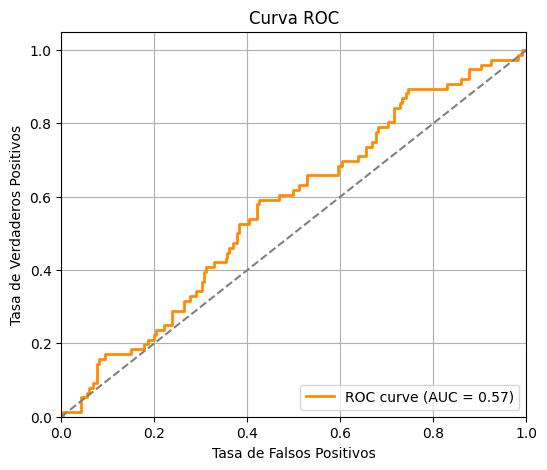

In [47]:
from sklearn.metrics import roc_curve, auc

# Calcular ROC y AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Verificar balance de clases en `df_train`

In [48]:
print(df_train['label'].value_counts())


label
0    1065
1     342
Name: count, dtype: int64


## Aumentamos la clase minoritaria (Glaucoma)

#### Dividir df_train en dos grupos

In [49]:
df_train_0 = df_train[df_train['label'] == 0]
df_train_1 = df_train[df_train['label'] == 1]


In [50]:
print(df_train_1.head())
print(df_train_1['label'].unique())


                                 image_path  label  source
1614    ./datos/G1020/Images/image_1896.jpg      1   G1020
1226     ./datos/G1020/Images/image_545.jpg      1   G1020
597            ./datos/ORIGA/Images/598.jpg      1   ORIGA
1884    ./datos/G1020/Images/image_2662.jpg      1   G1020
684   ./datos/REFUGE/train/images/g0035.jpg      1  REFUGE
[1]


#### Generador con aumentos para Glaucoma (label = 1)

In [51]:
df_train_0['label'] = df_train_0['label'].astype(np.float32)
df_train_1['label'] = df_train_1['label'].astype(np.float32)


/var/folders/mx/sjxkwhxj65g5pkzh_v8cwdp40000gp/T/ipykernel_87107/1516454450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_0['label'] = df_train_0['label'].astype(np.float32)
/var/folders/mx/sjxkwhxj65g5pkzh_v8cwdp40000gp/T/ipykernel_87107/1516454450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1['label'] = df_train_1['label'].astype(np.float32)


In [52]:
#generador solo para glaucoma
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_glaucoma_gen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

augmented_glaucoma_generator = augmented_glaucoma_gen.flow_from_dataframe(
    df_train_1,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=50,
    class_mode='raw',# ← Esta es la clave para sets con solo una clase, 2 clases es binary
    shuffle=True
)


Found 342 validated image filenames.


In [53]:
# Generador sin aumentos para clase 0

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador básico sin aumentos (solo normalización)
normal_gen = ImageDataGenerator(rescale=1./255)

no_glaucoma_generator = normal_gen.flow_from_dataframe(
    df_train_0,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=8,
    class_mode='raw',  # Igual que en glaucoma
    shuffle=True
)


Found 1065 validated image filenames.


### combinar generadores y entrenar el modelo

#### función para mezclar batches de ambos generadores

In [54]:
import numpy as np

def combined_generator(gen1, gen2):
    while True:
        batch1 = next(gen1)
        batch2 = next(gen2)

        # Combinar imágenes y etiquetas
        x = np.concatenate([batch1[0], batch2[0]], axis=0)
        y = np.concatenate([batch1[1], batch2[1]], axis=0)

        # Mezclar aleatoriamente
        idx = np.random.permutation(len(y))
        yield x[idx], y[idx]


####  crear el generador combinado

In [55]:
train_generator_balanced = combined_generator(no_glaucoma_generator, augmented_glaucoma_generator)


#### determinar los pasos por época

In [56]:
steps_per_epoch = min(len(no_glaucoma_generator), len(augmented_glaucoma_generator))
print("🔁 steps_per_epoch:", steps_per_epoch)


🔁 steps_per_epoch: 7


## Entrenar Modelo con la clase Glaucoma aumentada

In [60]:
#SE DEFINE CALLBACK MODEL CHECKPOINT
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback para guardar el mejor modelo basado en validación
checkpoint = ModelCheckpoint(
    filepath= model_path + 'resnet50_glaucomaaumentado.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Callback para detener temprano si no mejora
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

callbacks = [early_stop, checkpoint]


In [61]:
#MODELO

history = model.fit(
    train_generator_balanced,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9541 - loss: 0.0902
Epoch 1: val_loss improved from inf to 0.65160, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9523 - loss: 0.0906 - val_accuracy: 0.8068 - val_loss: 0.6516
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9678 - loss: 0.0830
Epoch 2: val_loss improved from 0.65160 to 0.60348, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9677 - loss: 0.0830 - val_accuracy: 0.8068 - val_loss: 0.6035
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9944 - loss: 0.0704   
Epoch 3: val_loss improved from 0.60348 to 0.55930, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9942 - loss: 0.0705 - val_accuracy: 0.8068 - val_loss: 0.5593
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.9936 - loss: 0.0620
Epoch 4: val_loss improved from 0.55930 to 0.52724, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9941 - loss: 0.0617 - val_accuracy: 0.8068 - val_loss: 0.5272
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.9987 - loss: 0.0471
Epoch 5: val_loss improved from 0.52724 to 0.50710, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9986 - loss: 0.0469 - val_accuracy: 0.8068 - val_loss: 0.5071
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 902ms/step - accuracy: 1.0000 - loss: 0.0419
Epoch 6: val_loss improved from 0.50710 to 0.49614, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0415 - val_accuracy: 0.8068 - val_loss: 0.4961
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 1.0000 - loss: 0.0338
Epoch 7: val_loss improved from 0.49614 to 0.49159, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0339 - val_accuracy: 0.8068 - val_loss: 0.4916
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 1.0000 - loss: 0.0305
Epoch 8: val_loss improved from 0.49159 to 0.49129, saving model to ./resnet50_glaucomaaumentado.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.8068 - val_loss: 0.4913
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 1.0000 - loss: 0.0263
Epoch 9: val_loss did not improve from 0.49129
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 1.0000 - loss: 0.0263 - val_accuracy: 0.8068 - val_loss: 0.4939
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 1.0000 - loss: 0.0220
Epoch 10: val_loss did not improve from 0.49129
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.8068 - val_loss: 0.4983
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0199
Epoch 11: val_loss did not improve from 0.49129
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.8068 - val_loss: 0.5039
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0228
Epoch 12: val_loss did not improve from 0.49129
7/7 ━━━━━━━━━━━━━━━━━━━━

## Evaluación del Modelo con clase Glaucoma aumentada

In [66]:
#CARGAR EL MODELO ENTRENADO

from tensorflow.keras.models import load_model

best_model = load_model(model_path + 'resnet50_glaucomaaumentado.h5')


In [67]:
# EVALUAR EN test_generator
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"📉 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")



10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 718ms/step - accuracy: 0.7219 - loss: 0.6189
📉 Test Loss: 0.5678
✅ Test Accuracy: 75.56%


In [68]:
#OBTENER PREDICCIONES (PROBABILIDADES Y CLASES)
# Probabilidades
y_prob = best_model.predict(test_generator)

# Clases predichas (umbral 0.6)
y_pred = (y_prob > 0.6).astype(int).flatten()

# Clases reales
y_true = test_generator.classes


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 717ms/step


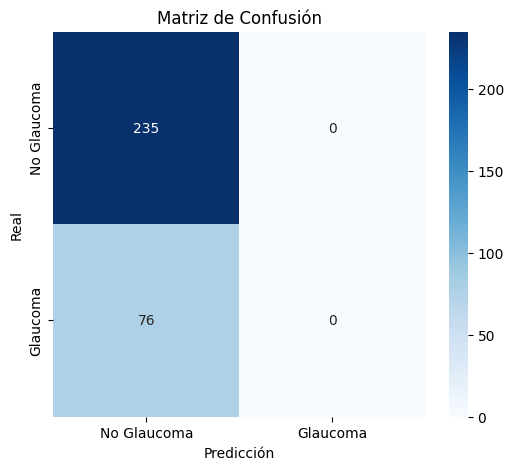

📋 Reporte de Clasificación:

              precision    recall  f1-score   support

 No Glaucoma       0.76      1.00      0.86       235
    Glaucoma       0.00      0.00      0.00        76

    accuracy                           0.76       311
   macro avg       0.38      0.50      0.43       311
weighted avg       0.57      0.76      0.65       311



/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gome33773/Documents/MIAA-ICESI-ProyectoIA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [69]:
#MATRIZ DE CONFUSIÓN Y REPORTE DE CLASIFICACIÓN

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Glaucoma', 'Glaucoma'],
            yticklabels=['No Glaucoma', 'Glaucoma'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte
print("📋 Reporte de Clasificación:\n")
print(classification_report(y_true, y_pred, target_names=['No Glaucoma', 'Glaucoma']))



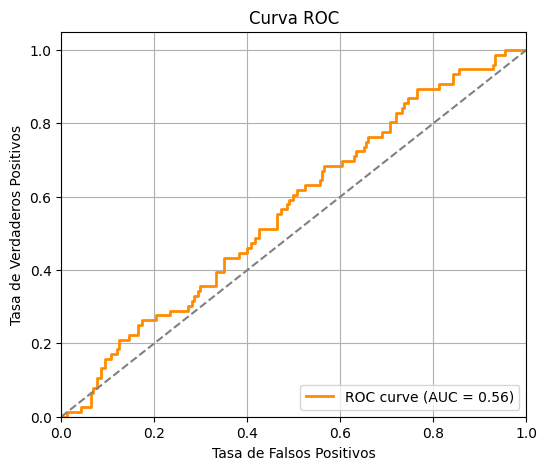

In [70]:
#CURVA ROC + AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥

No se ha encontrado cómo mejorar el modelo ResNet50 después de múltiples pruebas, el camino a seguir es seguir buscando los mejores parámetros para lograr una clasificación, si no se logra entonces abordar otro modelo.

🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
